In [1]:
import pandas as pd
import numpy as np

#Data
from sklearn.datasets import make_classification

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Measures
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}
classifier_names = list(classifiers.keys())
measure_steps = [5,15,25,50,100]
n_steps = len(measure_steps)
metrics = {
    'Accuracy': np.zeros((5, len(classifiers), n_steps)),
    'Precision': np.zeros((5, len(classifiers), n_steps)),
    'Recall': np.zeros((5, len(classifiers), n_steps)),
    'F1 Score': np.zeros((5, len(classifiers), n_steps))
}

In [3]:
for h, seed in enumerate([0,9,42,1234,9999]):
    for i, step in enumerate(measure_steps):

        X,y = make_classification(
            n_samples=10000,
            n_features=step,
            random_state=seed
        )

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        for j, (classifier_name, classifier) in enumerate(classifiers.items()):

                # Standardize the features (optional but often recommended)
                scaler = StandardScaler()
                train_X_scaled = scaler.fit_transform(X_train)
                test_X_scaled = scaler.transform(X_test)
                # Train the classifier
                classifier.fit(train_X_scaled, y_train)
                # Make predictions on the fixed test set
                predictions = classifier.predict(test_X_scaled)
                # Calculate metrics and store in the metrics dictionary
                metrics['Accuracy'][h, j, i] = balanced_accuracy_score(y_test, predictions)
                metrics['Precision'][h, j, i] = precision_score(y_test, predictions, average='weighted')
                metrics['Recall'][h, j, i] = recall_score(y_test, predictions, average='weighted')
                metrics['F1 Score'][h, j, i] = f1_score(y_test, predictions, average='weighted')

In [4]:
dataset_name = 'synthetic_dataset'

In [5]:
for k, metric in metrics.items():
    met = np.mean(metric,axis=0)
    print(met[0,:])

[0.91829116 0.92337179 0.92506572 0.92094757 0.91494817]
[0.91873017 0.92360759 0.92547279 0.92142685 0.91526004]
[0.9184     0.92333333 0.92513333 0.9208     0.91506667]
[0.91837315 0.9233232  0.9251137  0.92078327 0.91504505]


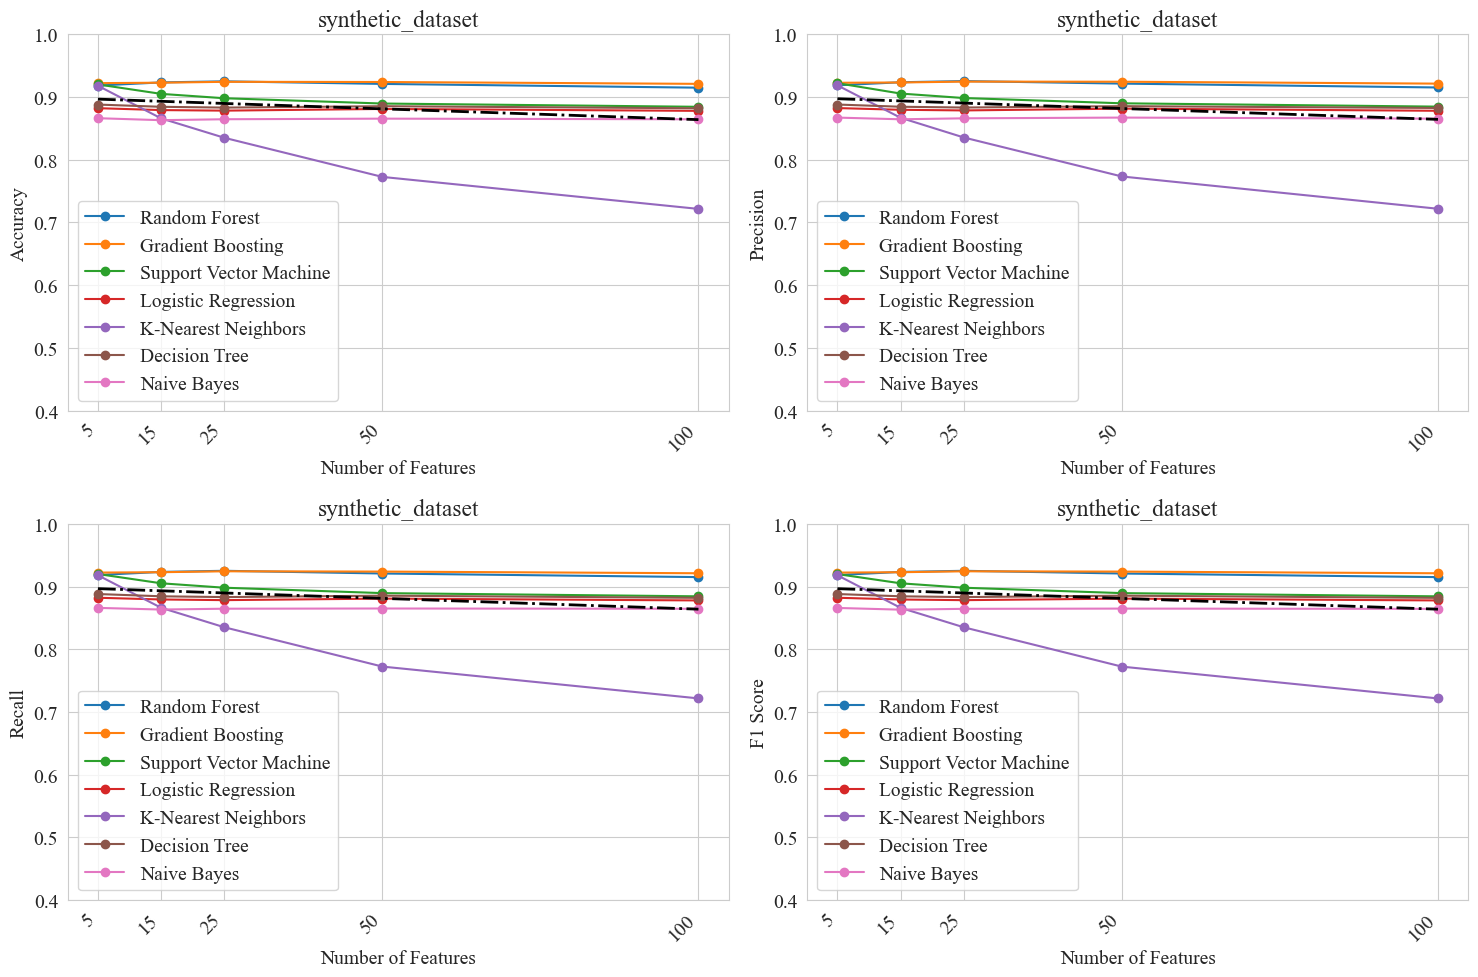

In [6]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):
        met = np.mean(metric,axis=0)
        z = sorted(zip(measure_steps, met[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel('Number of Features')
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_steps, np.mean(met,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/n_features_{dataset_name}.svg', format='svg')
plt.show()